In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

### Importing medical cost data set 
* raw link from github

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df_one_hot = pd.get_dummies(df,dtype="int32")

In [7]:
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
df_one_hot["sex_female"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex_female, Length: 1338, dtype: int32

In [9]:
X = df_one_hot.drop(columns = ["charges"])

In [10]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [11]:
y = df_one_hot[["charges"]]

In [12]:
y.shape

(1338, 1)

In [13]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


Spliting the data into `training set` and `testing set`

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [15]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1070, 11), (268, 11), (1070, 1), (268, 1))

Creating **model 1**

In [16]:
tf.random.set_seed(42)

# 1.create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile a model

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics=['mae']
)

# 3.fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13326.7412 - mae: 13326.7412
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13241.9482 - mae: 13241.9482
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13091.0830 - mae: 13091.0830
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12838.0742 - mae: 12838.0742
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12428.2891 - mae: 12428.2891
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11838.9062 - mae: 11838.9062
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11108.1514 - mae: 11108.1514
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10318.8818 - mae: 10318.8818
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 9556.4648 - mae: 9556.4648
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 8849.1045 

In [17]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6154.8677 - mae: 6154.8677


[6154.86767578125, 6154.86767578125]

Creating **model 2**

In [18]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"]
                         )
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13335.4297 - mae: 13335.4297
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13296.1025 - mae: 13296.1025
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13209.0801 - mae: 13209.0801
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13032.3994 - mae: 13032.3994
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12721.1914 - mae: 12721.1914
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12225.5713 - mae: 12225.5713
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11510.3809 - mae: 11510.3809
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10598.7383 - mae: 10598.7383
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 9622.1797 - mae: 9622.1797
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 8679.2861 

In [19]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5984.6016 - mae: 5984.6016


[5984.6015625, 5984.6015625]

Creating **model 3**

In [24]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"]
                         )

callback = tf.keras.callbacks.EarlyStopping(monitor="loss" , patience=5)
history = insurance_model_3.fit(X_train,y_train,epochs=800,callbacks=[callback])

Epoch 1/800
34/34 [==============================] - 1s 3ms/step - loss: 12824.3027 - mae: 12824.3027
Epoch 2/800
34/34 [==============================] - 0s 4ms/step - loss: 8719.8535 - mae: 8719.8535
Epoch 3/800
34/34 [==============================] - 0s 3ms/step - loss: 7502.2700 - mae: 7502.2700
Epoch 4/800
34/34 [==============================] - 0s 3ms/step - loss: 7317.6367 - mae: 7317.6367
Epoch 5/800
34/34 [==============================] - 0s 3ms/step - loss: 7211.5566 - mae: 7211.5566
Epoch 6/800
34/34 [==============================] - 0s 3ms/step - loss: 7091.3726 - mae: 7091.3726
Epoch 7/800
34/34 [==============================] - 0s 3ms/step - loss: 6957.9048 - mae: 6957.9048
Epoch 8/800
34/34 [==============================] - 0s 3ms/step - loss: 6792.1567 - mae: 6792.1567
Epoch 9/800
34/34 [==============================] - 0s 3ms/step - loss: 6609.5820 - mae: 6609.5820
Epoch 10/800
34/34 [==============================] - 0s 3ms/step - loss: 6469.2012 - mae: 6469.20

In [25]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1890.3083 - mae: 1890.3083


[1890.308349609375, 1890.308349609375]

(0.0, 200.0)

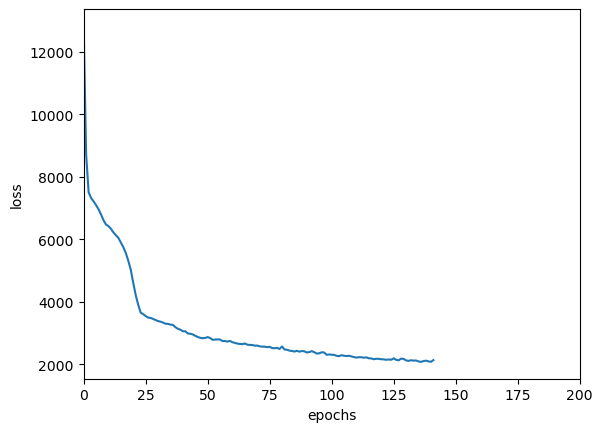

In [26]:
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim([0,200])

**REMAINDER :** read about early `stopping callback` in tensorflow documentation 

## PreProcessing data (Normalization and Standardization)

In terms of scaling values, neural networks tend to prefer the data to be `normalized`